In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
from tqdm import tqdm_notebook as tqdm

### Cliff Walking

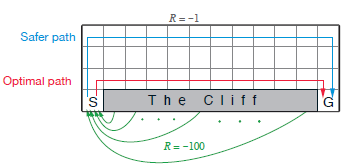

<ol>
    <li>This is grid World Environment. In which we Agent has to reach from Start to Goal. </li>
    <li>At every cell there are 4 option Up, Down, left and right.</li>
    <li>Every step gives you a reward of -1. except when you fall in the cliff.</li>
    <li>When you fall in th cliff. Episode restarts</li>
</ol>

In [2]:
class cliffWalking():
    
    def __init__(self,rows,col):
        '''
        initialize valiue for state value and other constant throught episode
        '''
        self.rows = rows
        self.col = col
        # 0: UP, 1:down, 2: left , 3: right
        self.actions = [0,1,2,3] 
#         self.actions = self.actions()
        #location for the cliff inthe grid
        self.clifRow = self.rows-1
        self.clifCol = [i for i in range(1,self.col-1)]
        self.QValues = self.initializeQvalues()
        
    def initializeQvalues(self):
        '''
        method to initialze the grid world
        '''
        qValues = dict()
        for i in range(0,self.rows):
            for j in range(0,self.col):
                #Action can move in 4 direction that is why list of len 4
                qValues[(i,j)] = np.zeros(4)
        return qValues
    
    def actions(self):
        '''
        Method to define possible action for each state
        '''
        stateAction =  dict()
        for i in range(0,self.rows):
            for j in range(0,self.col):
                action = []
                if i!=0:
                    action.append(0) #Up action
                if i!= self.rows-1:
                     action.append(1) #down action
                if j !=0:
                    action.append(2) #Up action
                if j != self.col-1:
                     action.append(3) #down action
                stateAction[(i,j)] = action
        return stateAction 
    
    def selectAction(self,state,epsilon):
        '''
        Select action with epsilon greedy based on Q values
        '''
        #with probabilty of (1-Epsilon) select best arm otherwise select any arm at random
        if random.random() < epsilon: 
            action = np.random.choice(self.actions)
        else : 
            action = np.argmax(self.QValues[state])
        return action
    
    def nextState(self,state,action,isEnd):
        '''
        Based on the state and action we have to find the next state
        '''
        state = list(state)
        if action == 0: #UP
            state[0] -= 1
            if state[0] < 0:
                state[0] = 0
                reward = -1
            else:
                reward = -1
            
        if action == 1 : #down
            state[0] += 1
            if state[0] >= self.rows:
                state[0] = self.rows-1
                reward = -1
            else:
                reward = -1
        
        if action == 2: #left
            state[1] -= 1
            if state[1] < 0:
                state[1] = 0
                reward = -1
            else:
                reward = -1
        
        if action == 3: # right
            state[1] += 1
            if state[1] >= self.col:
                state[1] = self.col-1
                reward = -1
            else:
                reward = -1
        #Condition when episode is going to end
        if state[0] == self.clifRow and state[1] in self.clifCol:
            isEnd = True
            reward = -100
        elif state[0] == self.rows-1 and state[1] == self.col-1 :
            isEnd = True
            reward = -1
            
        return tuple(state), reward,isEnd
  
    def showGrid(self):
        '''
        Method to prin the Grid
        '''
        mapp = {0: 'U',1: 'D',2:'L',3:'R'}
        print("*****************************************")
        for i in range(0,self.rows):
            strt = ""
            for j in range(0,self.col):
                if i == self.rows-1 and j == 0:
                    strt += " |S"
                elif i == self.rows-1 and j == self.col - 1:
                    strt += " |G"
                elif i == self.rows-1:
                    strt += " |C"
                else:
                    strt += " |" + str(mapp[np.argmax(self.QValues[i,j])])
            strt += "|"
            print(strt)
        print("*****************************************")

In [3]:
def SARSA(ep,alpha,showGrid = False):
    '''
    Method to compute the state action values through SARSA.
    '''
    cw = cliffWalking(4,12)
    rewardList = []
    for i in range(500):
        S = (cw.rows-1,0)
        A = cw.selectAction(S,ep)
        rewardSum = 0
        isEnd = False
        while not isEnd:
            sDash,R,isEnd = cw.nextState(S,A,isEnd)
            aDash = cw.selectAction(sDash,ep)
            rewardSum += R
            cw.QValues[S][A] = cw.QValues[S][A] + alpha * (R  + cw.QValues[sDash][aDash] - cw.QValues[S][A]) 
            S = sDash
            A = aDash
        rewardList.append(rewardSum)
    if showGrid == True:
        print("SARSA Grid")
        cw.showGrid()
    return rewardList

In [4]:
def QLearning(ep,alpha,showGrid = False):
    '''
    Method to compute the state action values through Q Learning.
    '''
    cw = cliffWalking(4,12)
    rewardList = []
    for i in range(500):
        S = (cw.rows-1,0)
        rewardSum = 0
        isEnd = False
        while not isEnd:
            A = cw.selectAction(S,ep)
            sDash,R,isEnd = cw.nextState(S,A,isEnd)
            rewardSum += R
            cw.QValues[S][A] = cw.QValues[S][A] + alpha * (R  + np.max(cw.QValues[sDash]) - cw.QValues[S][A]) 
            S = sDash
        rewardList.append(rewardSum)  
    if showGrid == True:
        print("Q Learning Grid")
        cw.showGrid()
    return rewardList

In [5]:
ep = 0.1
alpha = 0.1
SARSAReward = SARSA(ep,alpha,True)
QLearnReward = QLearning(ep,alpha,True)

SARSA Grid
*****************************************
 |U |R |R |R |R |R |R |R |R |R |R |D|
 |R |R |R |R |R |R |R |R |R |R |R |D|
 |U |U |U |U |L |U |U |R |L |R |R |D|
 |S |C |C |C |C |C |C |C |C |C |C |G|
*****************************************
Q Learning Grid
*****************************************
 |L |R |R |D |R |U |R |U |U |U |R |D|
 |R |R |R |R |R |R |R |R |D |R |R |D|
 |R |R |R |R |R |R |R |R |R |R |R |D|
 |S |C |C |C |C |C |C |C |C |C |C |G|
*****************************************


In [7]:
ep = 0.1
alpha = 0.1
iteration = 500
SARSARewardAvg = np.zeros(500)
QLearnRewardAvg = np.zeros(500)

for i in tqdm(range(iteration)):
    SARSAReward = SARSA(ep,alpha)
    SARSARewardAvg += SARSAReward  
    QLearnReward = QLearning(ep,alpha)
    QLearnRewardAvg += QLearnReward

SARSARewardAvg /= iteration
QLearnRewardAvg /= iteration

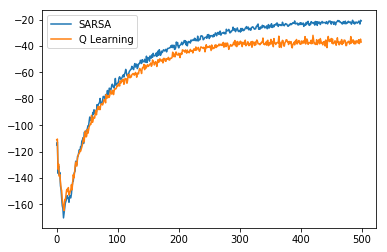

In [10]:
plt.plot(SARSARewardAvg,label = "SARSA")
plt.plot(QLearnRewardAvg,label = "Q Learning")
plt.legend()
#plt.yticks([-100,-75,-50,-25])
plt.show()